<b>Chargement et nettoyage de données<b>

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas as pd
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

data=pd.read_csv('train.csv')
for x in range(len(data.columns)):
    s = data.columns[x]
    if(s[0].isdigit()):
        new_name='X'+data.columns[x]
        data.rename(columns={data.columns[x]+'' : new_name+''}, inplace=True)


In [ ]:
data

<b>Données manquantes<b>

In [ ]:
missing_values = data.isnull().sum() / len(data)
print(missing_values)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values=pd.DataFrame({'Name':missing_values.index, 'count':missing_values.values})
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data.isnull().sum().sum()

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<b>Nettoyage de données<b>

In [44]:
#data.drop(['Alley','MiscFeature','PoolQC','Fence','FireplaceQu'], inplace=True, axis=1)
data.drop(['Utilities'], inplace=True, axis=1)
data.dropna(inplace=True)
quantitative = [f for f in data.columns if data.dtypes[f] != 'object']
quantitative.remove('SalePrice')
qualitative = [f for f in data.columns if data.dtypes[f] == 'object']


In [ ]:
data

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<b>Visualisation de la variable réponse<b>

In [ ]:
data.to_csv('data.csv')

In [43]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
y = data['SalePrice']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)

In [ ]:
print(qualitative)

In [ ]:
for c in qualitative:
    data[c] = data[c].astype('category')
    if data[c].isnull().any():
        data[c] = data[c].cat.add_categories(['MISSING'])
        data[c] = data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(data, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

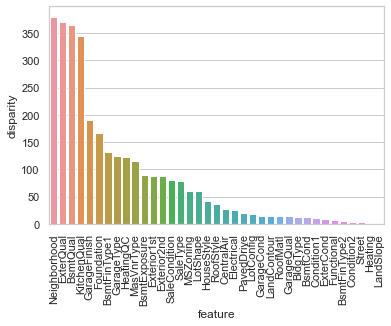

In [46]:
qualitative = [f for f in data.columns if data.dtypes[f] == 'object']

def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(data)

a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:3638: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))


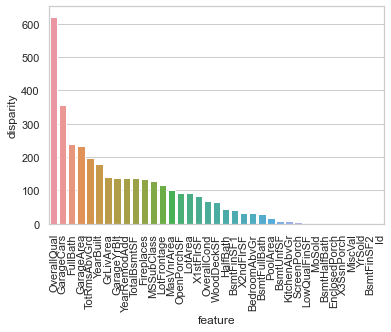

In [48]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = quantitative
    pvals = []
    for c in quantitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(data)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

Certaines catégories semblent plus diversifiées par rapport à SalePrice que d'autres. "Neighborhood" a un impact important sur les prix des logements. Le plus cher semble être Partial SaleCondition. Le fait d'avoir une piscine sur la propriété semble améliorer considérablement le prix. Il existe également des différences de variabilité entre les valeurs des catégories.

In [ ]:
most_important = ['OverallQual','GarageCars','GarageArea','FullBath','TotRmsAbvGrd','YearBuilt','GrLivArea',
                'Fireplaces','TotalBsmtSF','MSSubClass','YearRemodAdd','LotFrontage','X1stFlrSF']
corr = data[most_important].corr()
sns.heatmap(corr, xticklabels=True, yticklabels=True,cmap="Blues",vmin=0.5, vmax=1)

In [ ]:
features = ["OverallQual","GarageArea","FullBath","X1stFlrSF","TotalBsmtSF","LotFrontage","BsmtFinSF1","GrLivArea"]
ready_for_pca = data[features]
ready_for_pca.to_csv('ready_for_pca.csv')